# Submission Pertama: Menyelesaikan Permasalahan Human Resources
---
- Nama: Sinta Siti Nuriah
- Email: sinta@sttcipasung.ac.id
- Id Dicoding:

## Persiapan

### Menyiapkan Library yang dibutuhkan

In [1]:
!pip install bayesian-optimization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Menyiapkan data yang akan digunakan

In [3]:
!wget https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv

--2025-05-12 13:32:58--  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226188 (221K) [text/plain]
Saving to: ‘employee_data.csv’

employee_data.csv   100%[===================>] 220.89K  --.-KB/s    in 0.02s   

2025-05-12 13:32:58 (10.4 MB/s) - ‘employee_data.csv’ saved [226188/226188]



In [4]:
df = pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Business Understanding
### a. Latar Belakang
Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri.

Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

### b. Tujuan Bisnis
HR ingin:
- Menurunkan tingkat attrition yang terlalu tinggi karena berdampak pada biaya rekrutmen dan pelatihan.
- Memahami penyebab utama karyawan resign, agar bisa dilakukan intervensi tepat sasaran.
- Memonitor faktor-faktor risiko attrition melalui dashboard yang dapat digunakan secara berkala oleh tim HR.

## Data Understanding

Deskripsi Variabel
The data contains demographic details, work-related metrics and attrition flag.

- EmployeeId - Employee Identifier
- Attrition - Did the employee attrition? (0=no, 1=yes)
- Age - Age of the employee
- BusinessTravel - Travel commitments for the job
- DailyRate - Daily salary
- Department - Employee Department
- DistanceFromHome - Distance from work to home (in km)
- Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- EducationField - Field of Education
- EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- Gender - Employee's gender
- HourlyRate - Hourly salary
- JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
- JobLevel - Level of job (1 to 5)
- JobRole - Job Roles
- JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- MaritalStatus - Marital Status
- MonthlyIncome - Monthly salary
- MonthlyRate - Mounthly rate
- NumCompaniesWorked - Number of companies worked at
- Over18 - Over 18 years of age?
- OverTime - Overtime?
- PercentSalaryHike - The percentage increase in salary last year
- PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- StandardHours - Standard Hours
- StockOptionLevel - Stock Option Level
- TotalWorkingYears - Total years worked
- TrainingTimesLastYear - Number of training attended last year
- WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- YearsAtCompany - Years at Company
- YearsInCurrentRole - Years in the current role
- YearsSinceLastPromotion - Years since the last promotion
- YearsWithCurrManager - Years with the current manager

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
df.shape

(1470, 35)

In [7]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
numerical_features = df.select_dtypes(include=['number'])

Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = numerical_features[(numerical_features < lower_bound) | (numerical_features > upper_bound)].any(axis=1) # any(axis=1) will count outliers per row
num_outliers = outliers.sum()
print(num_outliers)

765


In [ ]:
df['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
0.0,0.830813
1.0,0.169187


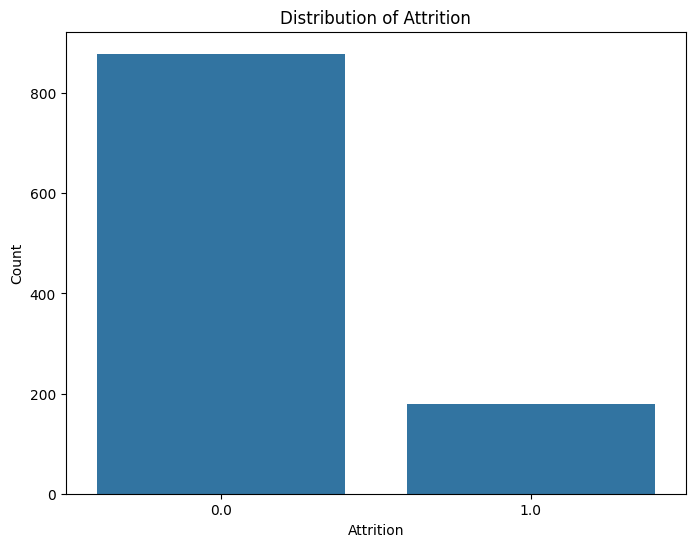

In [ ]:
## visualisasi Attrition terhadap data
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


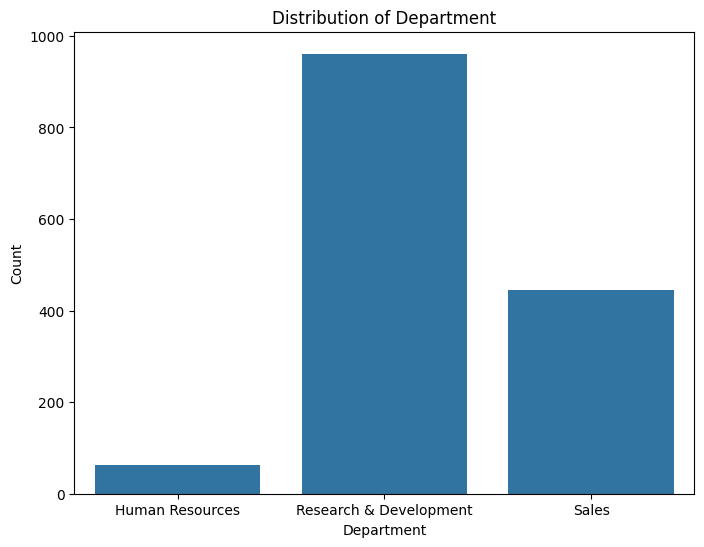

In [ ]:
## Visualisasi Departement terhadap data
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Department')
plt.title('Distribution of Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,882
Female,588


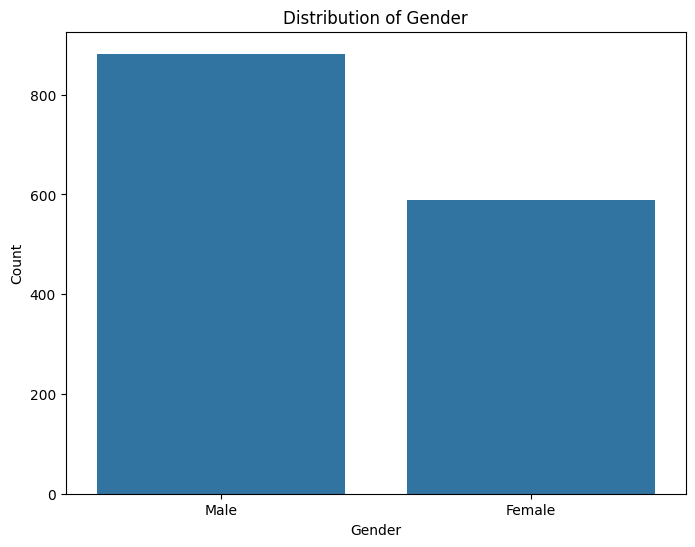

In [ ]:
# Visualisasi Gender terhadap data
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

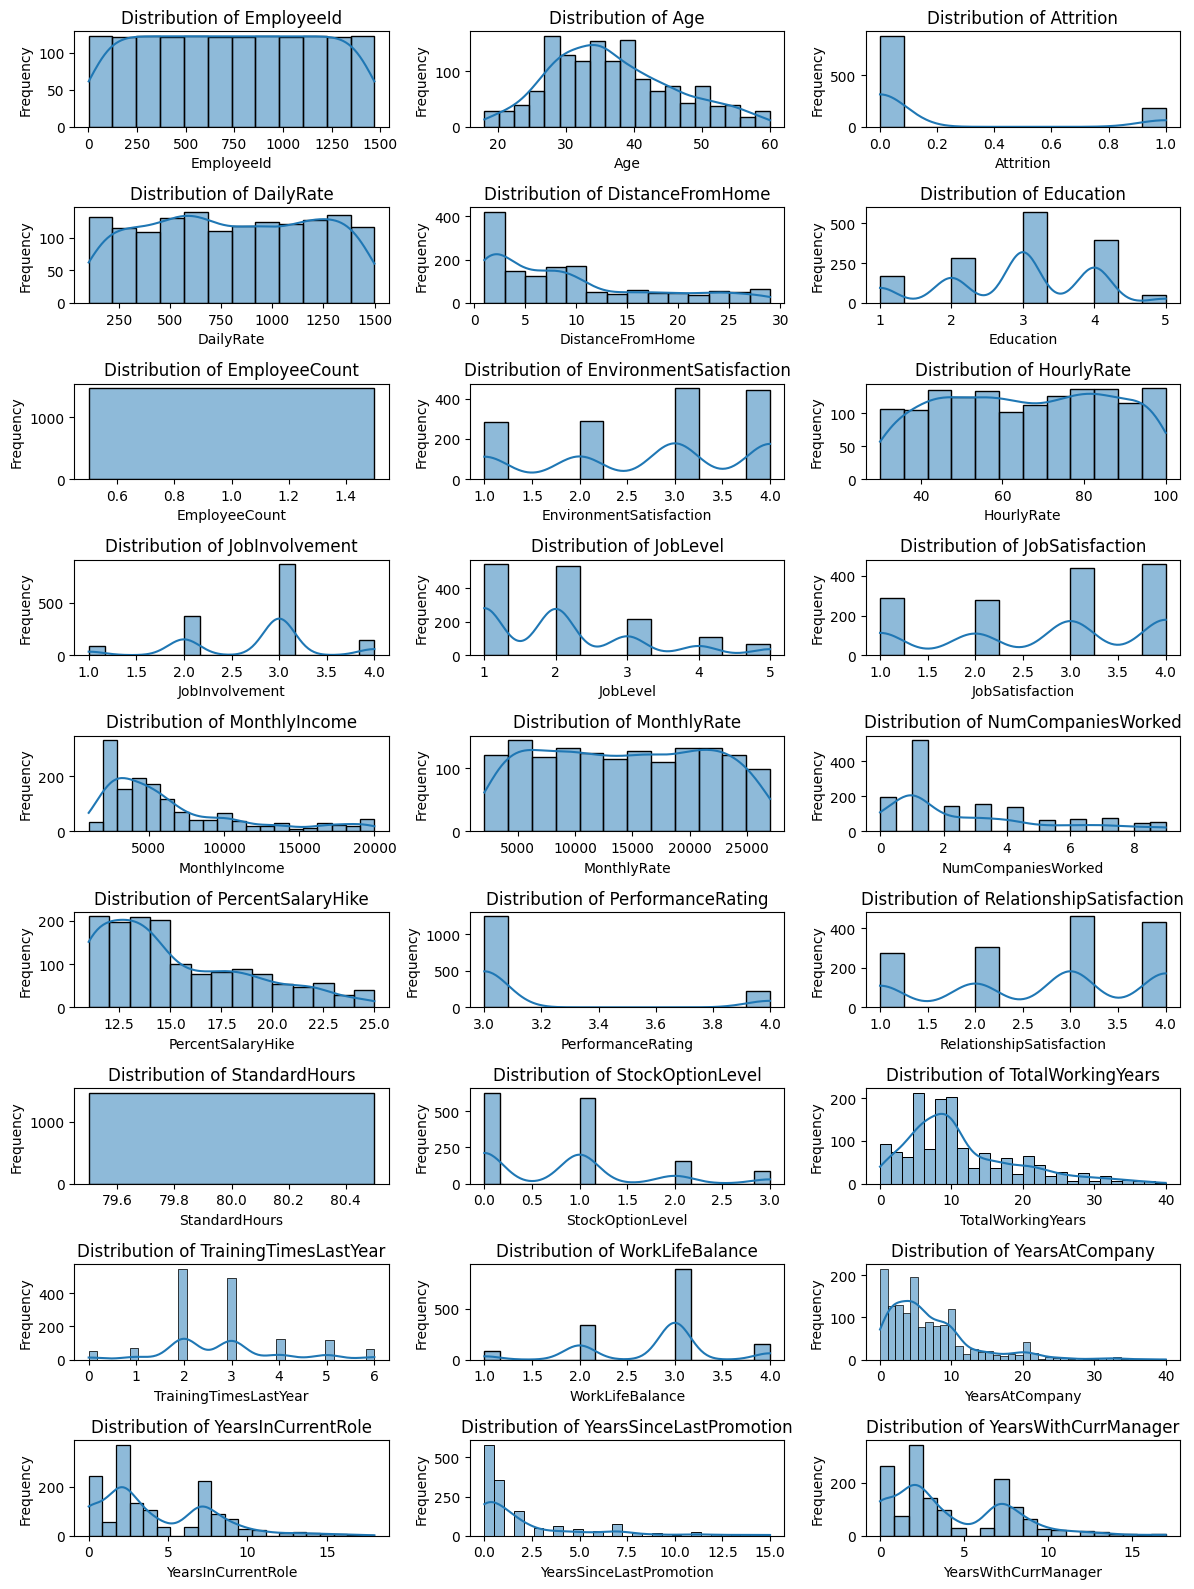

In [ ]:
numerical_features = df.select_dtypes(include=['number'])

num_rows = 9
num_cols = 3

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(12, 16))
fig.tight_layout(pad=3.0)
for i, column in enumerate(numerical_features.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

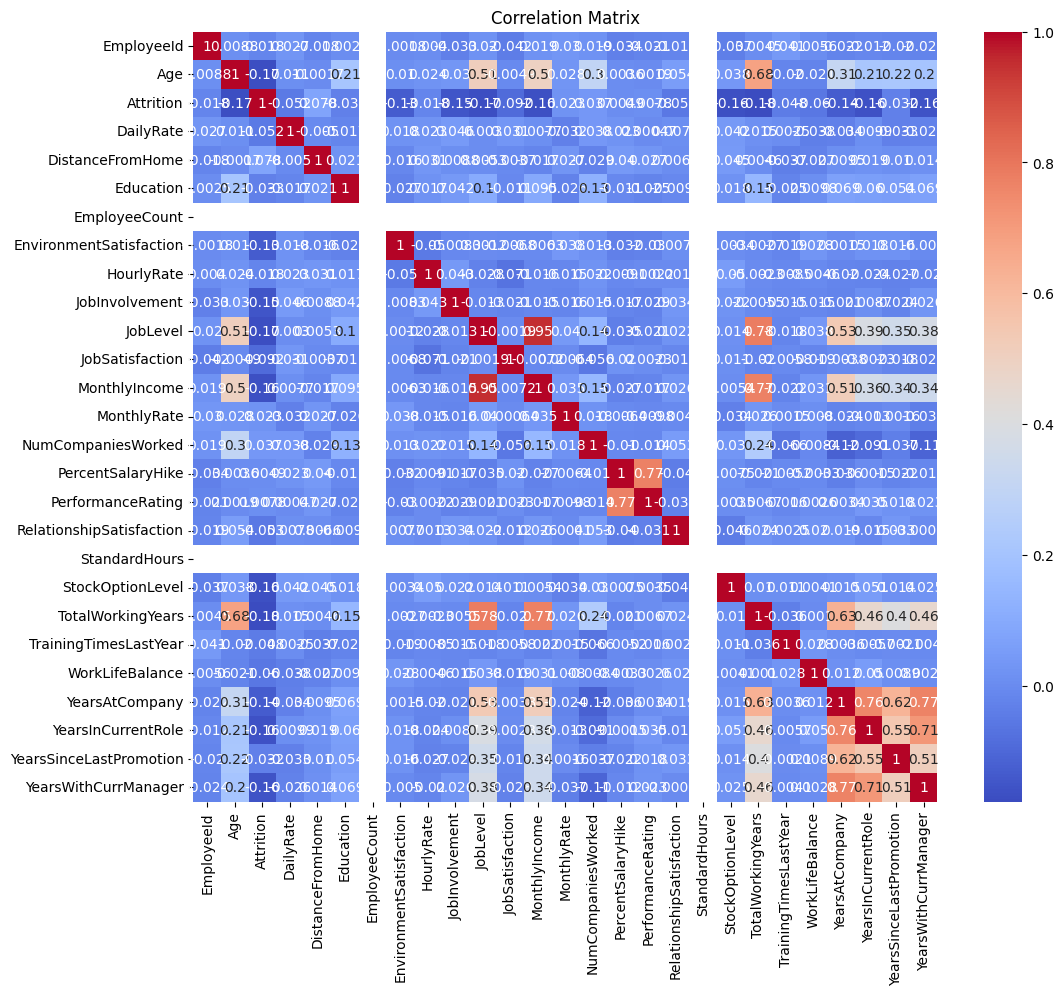

In [ ]:
matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## list Korelasi dengan nilainya
corr_matrix = numerical_features.corr()
corr_with_attrition = corr_matrix['Attrition'].sort_values(ascending=False)
print(corr_with_attrition)

Attrition                   1.000000
DistanceFromHome            0.078074
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
PerformanceRating           0.007755
PercentSalaryHike           0.004907
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
MonthlyIncome              -0.163600
StockOptionLevel           -0.164228
JobLevel                   -0.169201
Age                        -0.172067
TotalWorkingYears          -0.177137
EmployeeCount                    NaN
StandardHours                    NaN
N

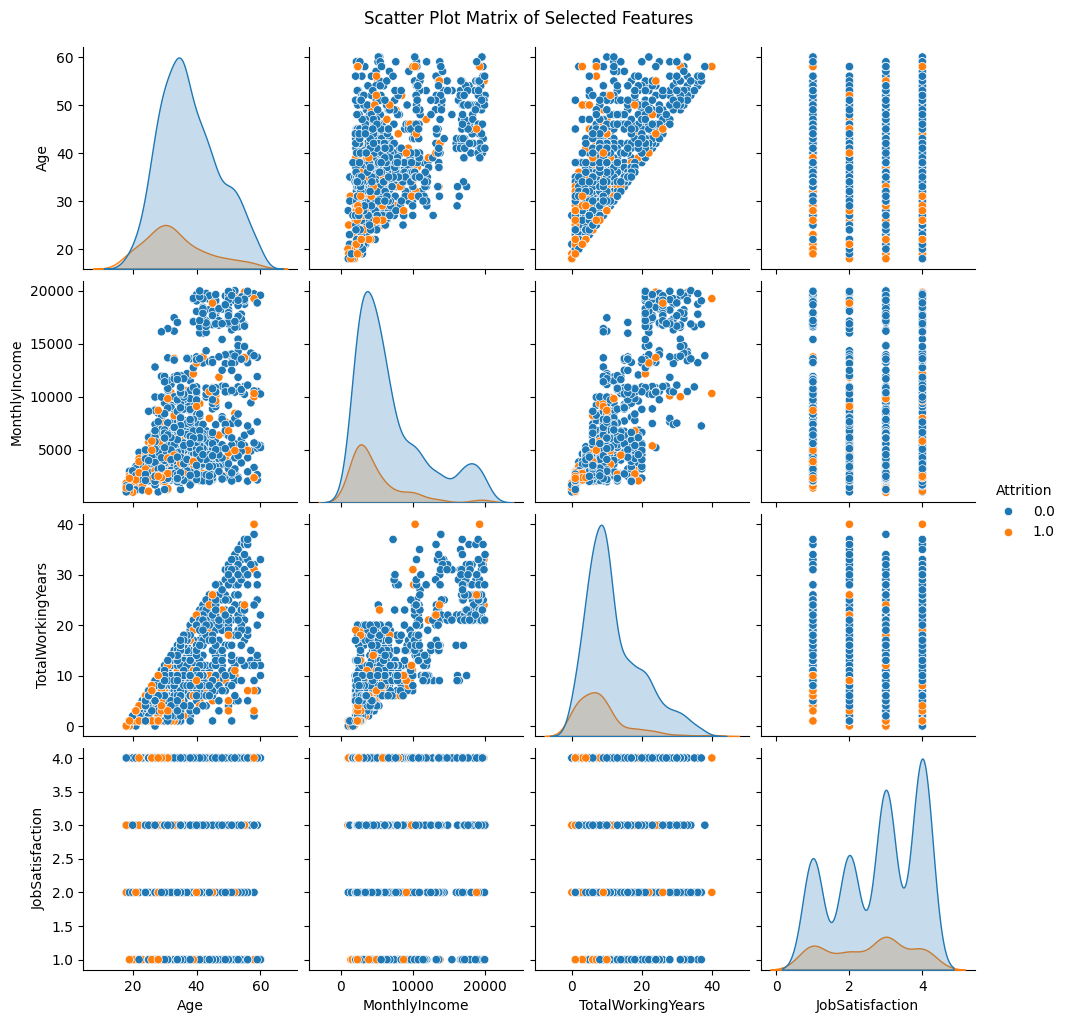

In [ ]:
features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'JobSatisfaction', 'Attrition']
sns.pairplot(df[features], hue='Attrition', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)
plt.show()

## Data Preparation / Preprocessing

### 1. Mengatasi Missing Value

In [19]:
df = df.dropna(subset=['Attrition'])

In [20]:
print(df['Attrition'].isnull().sum())
print(df['Attrition'].value_counts(normalize=True))

0
Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


Strategi untuk mengatasi missing value yaitu mengisinya dengan data yang sering muncul atau `mode`

### 2. Mengatasi Outliers

In [12]:
def detect_outliers_iqr_all(df):
    outlier_summary = {}
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = {
            'Jumlah Outlier': len(outliers),
            'Persentase': 100 * len(outliers) / len(df),
            'Batas Bawah': lower,
            'Batas Atas': upper
        }

    return pd.DataFrame(outlier_summary).T.sort_values(by='Jumlah Outlier', ascending=False)

# Gunakan fungsi
outlier_report = detect_outliers_iqr_all(df)
print(outlier_report)


                          Jumlah Outlier  Persentase  Batas Bawah  Batas Atas
Attrition                          179.0   16.918715        0.000       0.000
TrainingTimesLastYear              174.0   16.446125        0.500       4.500
PerformanceRating                  159.0   15.028355        3.000       3.000
YearsSinceLastPromotion             80.0    7.561437       -4.500       7.500
YearsAtCompany                      79.0    7.466919       -6.000      18.000
MonthlyIncome                       64.0    6.049149    -5854.125   17490.875
StockOptionLevel                    55.0    5.198488       -1.500       2.500
NumCompaniesWorked                  43.0    4.064272       -3.500       8.500
TotalWorkingYears                   29.0    2.741021       -9.000      31.000
YearsInCurrentRole                  15.0    1.417769       -5.500      14.500
YearsWithCurrManager                12.0    1.134216       -5.500      14.500
JobLevel                             0.0    0.000000       -2.00

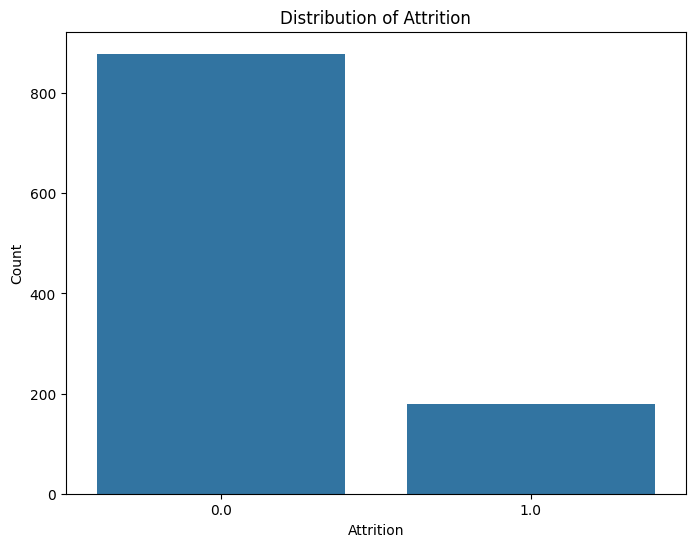

In [13]:
# distribusi Attrition
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [14]:
df.drop(columns=['EmployeeId'], inplace=True)

In [15]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,...,1,80,0,15,2,1,1,0,0,0
2,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,...,3,80,3,18,2,4,10,0,2,7
3,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,...,4,80,1,23,2,4,20,4,4,8
6,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,2,...,3,80,3,6,2,2,4,3,0,2
7,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,4,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,2,...,1,80,0,10,2,2,10,7,1,9
1465,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,3,...,4,80,0,10,4,4,1,0,0,0
1467,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,3,...,4,80,0,1,4,2,1,1,0,0
1468,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,3,...,2,80,1,6,0,3,4,2,0,0


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.unique()

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [17]:
df_enc = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
df_enc

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1,37,1.0,1141,11,2,1,1,61,1,2,...,False,False,False,False,False,False,False,True,False,False
2,51,1.0,1323,4,4,1,1,34,3,1,...,False,False,False,False,True,False,False,True,False,True
3,42,0.0,555,26,3,1,3,77,3,4,...,False,False,False,False,False,True,False,True,False,False
6,40,0.0,1124,1,2,1,2,57,1,2,...,False,False,False,False,False,True,False,True,False,True
7,55,1.0,725,2,3,1,4,78,3,5,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1.0,1366,24,2,1,2,72,2,3,...,False,False,False,False,False,False,False,False,True,False
1465,38,0.0,168,1,3,1,3,81,3,3,...,False,False,True,False,False,False,False,False,True,True
1467,28,1.0,1485,12,1,1,3,79,3,1,...,True,False,False,False,False,False,False,True,False,True
1468,40,0.0,458,16,2,1,3,74,3,1,...,False,False,False,False,True,False,False,False,False,False


### 3. Seleksi Fitur

In [21]:
df_enc.nunique().sort_values()

,0
EmployeeCount,1
StandardHours,1
PerformanceRating,2
Attrition,2
EducationField_Life Sciences,2
EducationField_Marketing,2
Department_Sales,2
Department_Research & Development,2
BusinessTravel_Travel_Rarely,2
BusinessTravel_Travel_Frequently,2


In [22]:
X_corr = df_enc.copy()
y_corr = X_corr['Attrition']

selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10)
selector = selector.fit(X_corr, y_corr)

selected_features = X_corr.columns[selector.support_]
print("Fitur yang dipilih RFE:", list(selected_features))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fitur yang dipilih RFE: ['Attrition', 'JobInvolvement', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Single', 'OverTime_Yes']


In [23]:
selected_features

Index(['Attrition', 'JobInvolvement', 'BusinessTravel_Travel_Frequently',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Sales Representative', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [24]:
df_selected = df_enc[selected_features]
df_selected

,Attrition,JobInvolvement,BusinessTravel_Travel_Frequently,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Single,OverTime_Yes
1,1.0,1,False,False,False,False,False,False,False,False
2,1.0,3,False,False,False,False,False,False,False,True
3,0.0,3,True,False,False,False,False,False,False,False
6,0.0,1,False,False,False,False,False,False,False,True
7,1.0,3,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1464,1.0,2,False,False,False,False,False,False,True,False
1465,0.0,3,False,False,False,True,False,False,True,True
1467,1.0,3,False,True,False,False,False,False,False,True
1468,0.0,3,False,False,False,False,False,False,False,False


### 3. Standarisasi

In [25]:
X = df_selected.drop(columns=['Attrition'])
y = df_selected['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Splitting data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

5. SMOTE

In [27]:
# smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Modeling

In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

`random_state` = 42 : digunakan untuk menetapkan seed dari generator angka acak agar hasilnya konsisten dan dapat direproduksi

In [49]:
# Fungsi yang akan dioptimasi
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42,
        n_jobs=-1
    )
    # 5-fold cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Range hyperparameter
pbounds = {
    'n_estimators': (10, 500),
    'max_depth': (5, 100),
    'min_samples_split': (2, 30),
    'min_samples_leaf': (1, 30),
}

optimizer = BayesianOptimization(
    f=rf_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Jalankan optimisasi
optimizer.maximize(init_points=5, n_iter=100)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.7476    | 40.58     | 28.57     | 22.5      | 303.3     |
| 2         | 0.7974    | 19.82     | 5.524     | 3.626     | 434.4     |
| 3         | 0.7582    | 62.11     | 21.53     | 2.576     | 485.3     |
| 4         | 0.7867    | 84.08     | 7.158     | 7.091     | 99.87     |
| 5         | 0.7753    | 33.9      | 16.22     | 14.09     | 152.7     |
| 6         | 0.7796    | 19.8      | 8.816     | 4.796     | 433.9     |
| 7         | 0.7931    | 17.76     | 1.172     | 2.831     | 435.1     |
| 8         | 0.8009    | 23.44     | 3.779     | 12.01     | 435.0     |
| 9         | 0.7967    | 20.76     | 1.737     | 11.72     | 431.9     |
| 10        | 0.7945    | 23.66     | 1.426     | 2.752     | 436.3     |
| 11        | 0.7988    | 20.57     | 3.169     | 14.54     | 442.4     |
| 12        | 0.7974    | 29.1      | 

`n_estimators`
   - Tipe: Integer
   - Range: 10 – 500
   - Deskripsi: Jumlah pohon keputusan (decision tree) dalam ensemble. Nilai lebih besar dapat meningkatkan akurasi, namun juga menambah waktu komputasi.

`max_depth`
   - Tipe: Integer
   - Range: 5 – 100
   - Deskripsi: Kedalaman maksimum dari setiap pohon. Nilai yang terlalu besar bisa menyebabkan overfitting.

`min_samples_split`
   - Tipe: Integer
   - Range: 2 – 30
   - Deskripsi: Minimum jumlah sampel yang diperlukan untuk membagi node internal. Nilai besar menghasilkan pohon yang lebih dangkal.

`min_samples_leaf`
   - Tipe: Integer
   - Range: 1 – 30
   - Deskripsi: Minimum jumlah sampel yang dibutuhkan untuk menjadi leaf node. Nilai lebih tinggi membuat model lebih general dan tahan terhadap overfitting.

In [50]:
best_params = optimizer.max['params']
model_best = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    random_state=42,
    n_jobs=-1
)
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

## Evaluation

In [29]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.7877358490566038
Confusion Matrix:
 [[150  26]
 [ 19  17]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       176
         1.0       0.40      0.47      0.43        36

    accuracy                           0.79       212
   macro avg       0.64      0.66      0.65       212
weighted avg       0.80      0.79      0.79       212



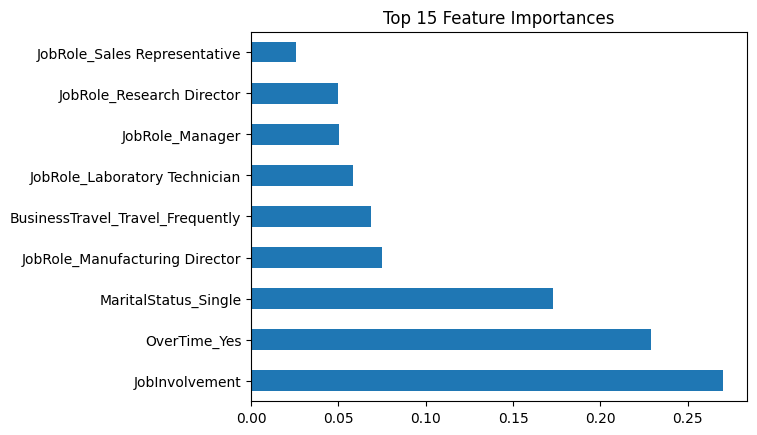

In [30]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8066037735849056
Confusion Matrix:
 [[154  22]
 [ 19  17]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       176
         1.0       0.44      0.47      0.45        36

    accuracy                           0.81       212
   macro avg       0.66      0.67      0.67       212
weighted avg       0.81      0.81      0.81       212



In [54]:
# save model
import joblib
joblib.dump(model_best, 'model_best.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']